# 자연어 데이터 전처리 및 기본 분석

In [1]:
!conda list nltk

# packages in environment at /Users/imac4.5k-r.g./opt/anaconda3:
#
# Name                    Version                   Build  Channel
nltk                      3.6.2              pyhd3eb1b0_0  


In [2]:
import nltk

In [3]:
nltk.download( 'stopwords' )
nltk.download( 'punkt' )
nltk.download( 'wordnet' )

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imac4.5k-r.g./nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/imac4.5k-r.g./nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/imac4.5k-r.g./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# IPython 매직 명령
%matplotlib inline

# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 환경 설정
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

from matplotlib import font_manager, rc

# Windows 사용시 matplotlib 한글 폰트 사용 설정
# font_path = "c:\\Windows\\Fonts\\malgun.ttf"
# font_name = font_manager.FontProperties( fname = font_path ).get_name()
# rc( 'font', family = font_name )

# Mac OS 사용시 matplotlib 한글 폰트 사용 설정
rc( 'font', family = 'AppleGothic' )

import warnings
warnings.filterwarnings( 'ignore' )

In [5]:
import glob # 경로와 이름을 지정하여 파일을 다루는 파일 처리 작업을 위한 모듈
import re # 정규표현식 모듈

from functools import reduce # 2차원 리스트를 1차원 리스트로 차원을 축소하는 모듈
from collections import Counter # 데이터 집합에서 개수를 자동으로 계산하는 모듈

# nltk 패키지 내용
from nltk.tokenize import word_tokenize # 단어 토큰화 모듈
from nltk.corpus import stopwords # 불용어 처리 모듈
from nltk.stem import WordNetLemmatizer # 표제어 추출 모듈

## 데이터 수집

* 자연어 데이터 메모리 로드
* 데이터프레임 생성

In [6]:
# 파일 이름 목록 생성
all_files = glob.glob( '../data/myCabinetExcelData*.xls' )
all_files

['../data/myCabinetExcelData (1).xls',
 '../data/myCabinetExcelData (2).xls',
 '../data/myCabinetExcelData (3).xls',
 '../data/myCabinetExcelData (4).xls',
 '../data/myCabinetExcelData (5).xls',
 '../data/myCabinetExcelData (6).xls',
 '../data/myCabinetExcelData (7).xls',
 '../data/myCabinetExcelData (8).xls',
 '../data/myCabinetExcelData (9).xls',
 '../data/myCabinetExcelData.xls']

In [7]:
# 엑셀파일을 읽어서 데이터프레임 생성후 리스트에 저장
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel( file )
    all_files_data.append( data_frame )
    
all_files_data[ 0 ]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Why Big Data = B...,unknown,Mary Ann Leibert,2014
1,NaN,2,Correction to: P...,unknown,Mary Ann Leibert,2019
2,NaN,3,Authors' Respons...,unknown,Mary Ann Leibert,2014
3,NaN,4,Data Science and...,unknown,Mary Ann Leibert,2013
4,NaN,5,Big-BOE: Fusing ...,"Basanta-Val, P.;...",Mary Ann Leibert,2018
...,...,...,...,...,...,...
95,NaN,96,Intelligent big ...,"Tsai, Chun-Wei; ...",Inderscience,2015
96,NaN,97,Clustering Big S...,"Shao, W.; Salim,...",unknown,2016
97,NaN,98,Health big data ...,"Kuo, Mu-Hsing; S...",Inderscience,2014
98,NaN,99,Intelligent big ...,"Tsai, Chun-Wei; ...",Inderscience,2014


In [8]:
# 데이터프레임 병합
all_files_data_concat = pd.concat( all_files_data, axis = 0, ignore_index = True )
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Why Big Data = B...,unknown,Mary Ann Leibert,2014
1,NaN,2,Correction to: P...,unknown,Mary Ann Leibert,2019
2,NaN,3,Authors' Respons...,unknown,Mary Ann Leibert,2014
3,NaN,4,Data Science and...,unknown,Mary Ann Leibert,2013
4,NaN,5,Big-BOE: Fusing ...,"Basanta-Val, P.;...",Mary Ann Leibert,2018
...,...,...,...,...,...,...
995,NaN,96,Intelligent big ...,"Tsai, Chun-Wei; ...",Inderscience,2015
996,NaN,97,Clustering Big S...,"Shao, W.; Salim,...",unknown,2016
997,NaN,98,Health big data ...,"Kuo, Mu-Hsing; S...",Inderscience,2014
998,NaN,99,Intelligent big ...,"Tsai, Chun-Wei; ...",Inderscience,2014


In [9]:
all_files_data_concat.to_csv( '../data/riss_bigdata.csv', encoding = 'utf-8',
                              index = False )

## 자연어 처리를 위한 데이터 전처리

* 제목 내용을 이용한 자연어 처리
* 데이터 전처리 내용
    1. 영어 이외 문자 제거( cleaning )
    2. 소문자로 정규화( normalization )
    3. 단어 토큰화( tokenization )
    4. 불용어( stopword ) 제거
    5. 단어 형태 일반화를 위한 표제어( lemma ) 추출

In [14]:
# 자연어 처리 대상 변수 선택
all_title = all_files_data_concat[ '제목' ]
all_title

0      Why Big Data = B...
1      Correction to: P...
2      Authors' Respons...
3      Data Science and...
4      Big-BOE: Fusing ...
              ...         
995    Intelligent big ...
996    Clustering Big S...
997    Health big data ...
998    Intelligent big ...
999    Improved big dat...
Name: 제목, Length: 1000, dtype: object

In [15]:
all_title[ 0 ]

'Why Big Data = Big Deal'

In [16]:
all_title[ 1 ]

'Correction to: Predictive Modeling with Big Data: Is Bigger Really Better? by Junqué de Fortuny E, Martens D, and Provost F. Big Data 2013;1(4):215–226.'

In [17]:
stopwords = set( stopwords.words( 'english' ) ) # 불용어 저장
lemma = WordNetLemmatizer() # 표제어 객체 생성

In [19]:
# 데이터 전처리 내용
words = []
for title in all_title:
    # 1. 영어 이외 문자 제거(cleaning )
    enwords = re.sub( r"[^a-zA-Z]", " ", str( title ) ) 

    # 2. 소문자로 정규화( normalization )
    # 3. 단어 토큰화( tokenization )
    enwordstoken = word_tokenize( enwords.lower() )
    
    # 4. 불용어( stopword ) 제거
    enwordstokenstop = [ w for w in enwordstoken if w not in stopwords ]
    
    # 5. 단어 형태 일반화를 위한 표제어( lemma ) 추출
    enwordstokenstoplemma = [ lemma.lemmatize( w ) for w in enwordstokenstop ]
    
    words.append( enwordstokenstoplemma )

In [20]:
print( words )

[['big', 'data', 'big', 'deal'], ['correction', 'predictive', 'modeling', 'big', 'data', 'bigger', 'really', 'better', 'junqu', 'de', 'fortuny', 'e', 'marten', 'provost', 'f', 'big', 'data'], ['author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology'], ['big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science'], ['thermal', 'aware', 'dvfs', 'enabled', 'big', 'data', 'task', 'scheduling', 'data', 'center'], ['reference', 'architecture', 'big', 'data', 'solution', 'introducing', 'model', 'perform', 'predictive', 'analytics', 'using', 'big', 'data', 'technology'], ['resting', 'state', 'fmri', 'functional', 'connectivity', 'big', 'data', 'preprocessing', 'pipeline', 'topological', 'data', 'an

In [21]:
# 전처리 결과를 1차원 리스트로 변환
words2 = list( reduce( lambda x, y: x + y, words ) )
print( words2 )

['big', 'data', 'big', 'deal', 'correction', 'predictive', 'modeling', 'big', 'data', 'bigger', 'really', 'better', 'junqu', 'de', 'fortuny', 'e', 'marten', 'provost', 'f', 'big', 'data', 'author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology', 'big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science', 'thermal', 'aware', 'dvfs', 'enabled', 'big', 'data', 'task', 'scheduling', 'data', 'center', 'reference', 'architecture', 'big', 'data', 'solution', 'introducing', 'model', 'perform', 'predictive', 'analytics', 'using', 'big', 'data', 'technology', 'resting', 'state', 'fmri', 'functional', 'connectivity', 'big', 'data', 'preprocessing', 'pipeline', 'topological', 'data', 'analysis', 'call', 

## 데이터 탐색

* 단어 빈도수 구하기 및 시각화

In [24]:
len( words2 )

9584

In [22]:
# 단어 빈도수 계산
count = Counter( words2 )
count

Counter({'big': 1328,
         'data': 1556,
         'deal': 18,
         'correction': 5,
         'predictive': 16,
         'modeling': 10,
         'bigger': 8,
         'really': 5,
         'better': 4,
         'junqu': 2,
         'de': 2,
         'fortuny': 2,
         'e': 8,
         'marten': 2,
         'provost': 2,
         'f': 4,
         'author': 4,
         'response': 4,
         'gong': 2,
         'comment': 2,
         'science': 48,
         'relationship': 5,
         'driven': 29,
         'decision': 21,
         'making': 20,
         'boe': 2,
         'fusing': 2,
         'spanish': 2,
         'official': 2,
         'gazette': 2,
         'technology': 23,
         'guide': 2,
         'understanding': 12,
         'climate': 6,
         'change': 13,
         'case': 10,
         'theory': 7,
         'guided': 2,
         'thermal': 2,
         'aware': 12,
         'dvfs': 2,
         'enabled': 6,
         'task': 4,
         'scheduling': 5,
   

In [25]:
len( count )

2203

In [26]:
# 단어 출현 횟수( 빈도 )가 많은 상위 50개 단어중 단어 길이 1보다 큰 단어 선택
word_count = {}
for tag, counts in count.most_common( 50 ):
    if len( str( tag ) ) > 1:
        word_count[ tag ] = counts
        print( f'{tag} : {counts}' )

data : 1556
big : 1328
analytics : 140
analysis : 72
based : 63
using : 55
science : 48
system : 48
challenge : 46
management : 46
approach : 44
model : 42
earth : 40
research : 36
mining : 35
learning : 35
health : 35
new : 34
cloud : 33
smart : 33
processing : 30
driven : 29
issue : 29
opportunity : 29
framework : 27
perspective : 25
technology : 23
information : 23
survey : 23
service : 23
review : 23
small : 23
business : 22
computing : 22
quality : 22
use : 22
decision : 21
efficient : 21
healthcare : 21
knowledge : 21
making : 20
privacy : 20
city : 19
application : 19
market : 19
deal : 18
care : 18
machine : 18
distributed : 18
platform : 18


In [27]:
len( word_count )

50

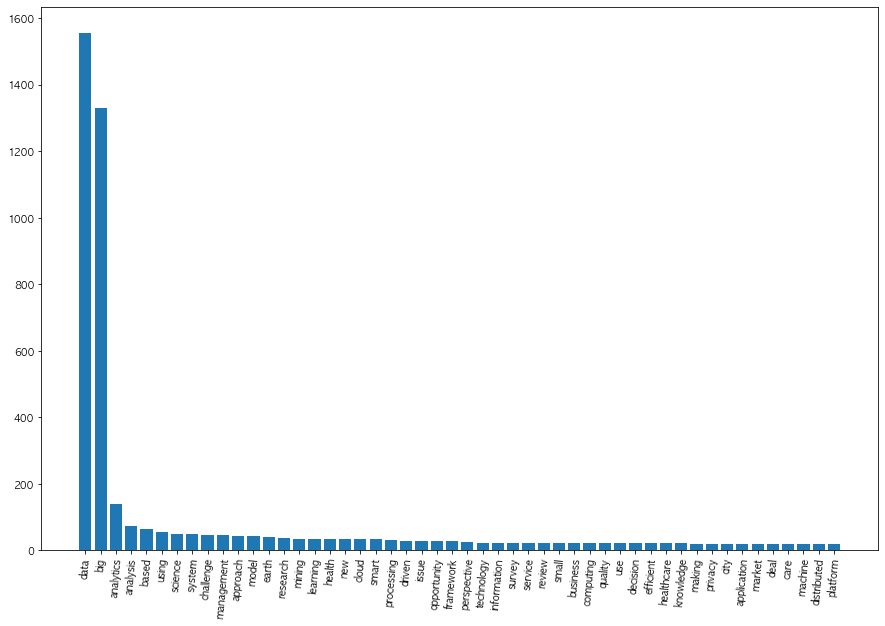

In [30]:
# 단어 빈도 시각화
sorted_keys = sorted( word_count, key = word_count.get, reverse = True )
sorted_values = sorted( word_count.values(), reverse = True )

plt.figure( figsize = ( 15, 10 ) )
plt.bar( range( len( word_count ) ), sorted_values, align = 'center' )
plt.xticks( range( len( word_count ) ), list( sorted_keys ), rotation = '85' )
plt.show()

## 데이터 탐색

* 'Big data' 영어 학술 문서 제목 키워드 분석을 위핸 년도별 학술 문서 수 추출 및 키워드에 대한 시각화

In [31]:
all_files_data_concat[ 'doc_count' ] = 0
summary_year = all_files_data_concat.groupby( '출판일', as_index = False )[ 'doc_count' ].count()
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,1
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


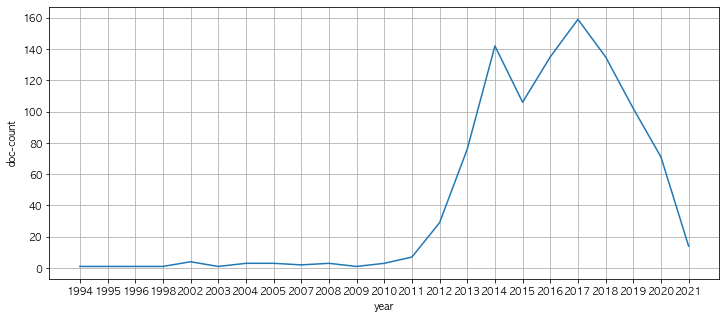

In [32]:
plt.figure( figsize = ( 12, 5 ) )
plt.xlabel( 'year' )
plt.ylabel( 'doc-count' )
plt.grid( True )
plt.plot( range( len( summary_year ) ), summary_year[ 'doc_count' ] )
plt.xticks( range( len( summary_year ) ), [ text for text in summary_year[ '출판일' ] ] )
plt.show()

* 'Big data' 관련 논문 제목에 대한 워드 클라우드 시각화 - 워드 클라우드

In [33]:
!conda list wordcloud

# packages in environment at /Users/imac4.5k-r.g./opt/anaconda3:
#
# Name                    Version                   Build  Channel
wordcloud                 1.8.1                    pypi_0    pypi


In [ ]:
# wordcloud package 설치
!pip install wordcloud

In [34]:
from wordcloud import STOPWORDS, WordCloud

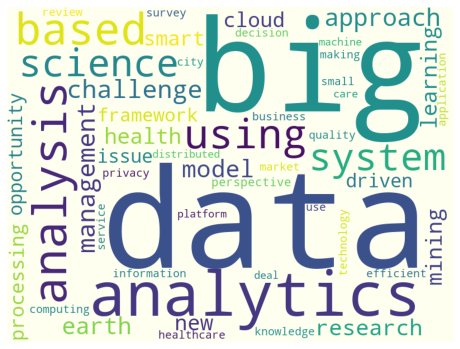

In [35]:
stopwords = set( STOPWORDS )
wc = WordCloud( background_color = 'ivory', stopwords = stopwords,
                width = 800, height = 600 )
cloud = wc.generate_from_frequencies( word_count )

plt.figure( figsize = ( 8, 8 ) )
plt.imshow( cloud )
plt.axis( 'off' )
plt.show()

In [36]:
!conda list konlpy

# packages in environment at /Users/imac4.5k-r.g./opt/anaconda3:
#
# Name                    Version                   Build  Channel
konlpy                    0.5.2                    pypi_0    pypi


In [ ]:
!pip install konlpy

## 한글 자연어 처리

In [38]:
import json

from konlpy.tag import Okt

In [40]:
import tweepy
tweepy.__version__

'3.10.0'

In [ ]:
!pip install tweepy==3.10.0

In [39]:
filename = '../data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'
data = json.loads( open( filename + '.json', 'r', encoding = 'utf-8'
                       ).read() )
data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '